
 -----sim 0
Select the ad Number: 
60 enter
Select the ad Number: 
15 enter
Select the ad Number: 
34 enter
Select the ad Number: 
83 enter
Select the ad Number: 
64 enter
Select the ad Number: 
0 enter
Select the ad Number: 
14 enter
Select the ad Number: 
18 enter
Select the ad Number: 
70 enter
Select the ad Number: 
60 enter

 -----sim 1
Select the ad Number: 
86 enter
Select the ad Number: 
9 enter
Select the ad Number: 
73 enter
Select the ad Number: 
85 enter
Select the ad Number: 
31 enter
Select the ad Number: 
92 enter
Select the ad Number: 
35 enter
Select the ad Number: 
80 enter
Select the ad Number: 
8 enter
Select the ad Number: 
88 enter
[11.0145741   6.45591579]


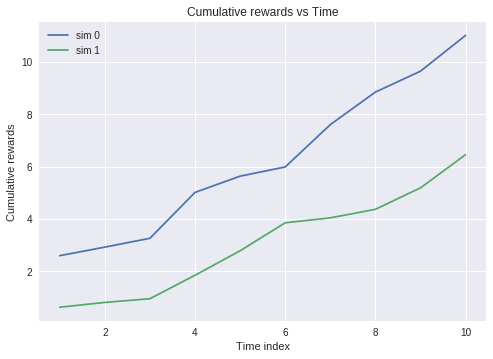

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt


class adSelector():

    def __init__(self, reward_matrix, values):
        self.N = reward_matrix.shape[0]
        self.T = reward_matrix.shape[1]
        self.num_sims = reward_matrix.shape[2]
        
        return


    # 아래 함수를 수정. 필요한 경우 input 인자 등을 추가.
    def select_ad(self):
        print("Select the ad Number: ")
        adnum = np.random.randint(100, size=(1))
        print("%d" %adnum, "enter")
        
        return adnum



def test_algorithm(algo, reward_matrix):

    N = reward_matrix.shape[0]
    T = reward_matrix.shape[1]
    num_sims = reward_matrix.shape[2]
    cumulative_rewards = np.zeros((num_sims,T))
    sigma = 1 * np.random.randn(1) + 0
    a = 0
    
    if sigma < 0:
        sigma = -sigma
    
    for sim in range(num_sims):
        print("\n", "-----sim %d" %a)
        a += 1
        
        for t in range(T):
            chosen_ad = algo.select_ad()
            #print(chosen_ad)
            reward = reward_matrix[chosen_ad,t,sim]
            if reward < 0:
                reward = -reward * sigma
            else:
                reward = reward * sigma
            #print(reward)
            if t == 0:
                cumulative_rewards[sim,t] = reward
            else:
                cumulative_rewards[sim,t] = cumulative_rewards[sim,t-1] + reward
            '''
            if t is 0:
                print(0.0)
            else:
                print(cumulative_rewards[sim][t-1])
            '''
                
    #print(cumulative_rewards)
    return cumulative_rewards


# 훈련집합 (Training set) 생성. 이 부분은 테스트집합으로 변경하여 테스트할 것임.  
N = 100
T = 10
num_sims = 2
#reward_matrix = np.zeros((N,T,num_sims))
reward_matrix = 1 * np.random.randn(N,T,num_sims) + 0
#reward_matrix = np.random.randint(N, size=(N,T,num_sims))
random.seed(0)

for sim in range(num_sims):
    shuffled_index = np.random.permutation(N)
    reward_matrix[shuffled_index[0],:,sim] = [np.random.binomial(1, p=i/T) for i in range(T)]
    reward_matrix[shuffled_index[1],:,sim] = [np.random.binomial(1, p=1-i/T) for i in range(T)]
    reward_matrix[shuffled_index[2],:,sim] = [np.random.binomial(1, p=3/4) for i in range(T)]


# 학습 알고리즘 테스트.
algo = adSelector(reward_matrix,[])
results = test_algorithm(algo, reward_matrix)

print(results[:,T-1])
#print(results)


# 학습 결과를 그래프로 출력.
for i in range(num_sims):
    plt.plot(range(1,T+1), results[i,:], label="sim {}".format(i))
    
plt.plot()
plt.xlabel("Time index")
plt.ylabel("Cumulative rewards")
plt.title("Cumulative rewards vs Time")
plt.legend()
plt.show()

In [9]:
np.random.rand(3,2,3)

array([[[0.38850238, 0.62367363, 0.46654404],
        [0.22186485, 0.90478104, 0.24030007]],

       [[0.09058381, 0.9494604 , 0.73234359],
        [0.68707027, 0.34722721, 0.52391873]],

       [[0.61543598, 0.84526045, 0.62098762],
        [0.49273943, 0.72505604, 0.94218309]]])

In [36]:
#np.random.randint(5, size=(3,2,3))
np.random.randint(100, size=(1))

array([62])

In [45]:
##  For random samples from N(\mu, \sigma^2), use:
##  sigma * np.random.randn(...) + mu
1 * np.random.randn(1) + 0

array([0.55805156])